In [6]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
import pandas as pd
import os
from matplotlib import font_manager, rc
from scipy.stats import multivariate_normal as mvn
import scipy as sp

from scipy import linalg

from sklearn.cluster import KMeans
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
csfont = {'fontname':'Times New Roman'}

## References

https://github.com/AlexanderFabisch/gmr

https://towardsdatascience.com/gaussian-mixture-modelling-gmm-833c88587c7f

https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

http://norman3.github.io/prml/docs/chapter09/2



## Load Data

In [89]:
os.chdir(r'D:\Dropbox\0. HY\5. KBU_gait\00. Full data')
#os.chdir(r'C:\Users\gkdbs\Dropbox\0. HY\5. KBU_gait\00. Full data')

dataset = pd.read_csv('normal_left_perc_x.csv', sep=',',header=None) #.dropna(axis=0)
nor_left_x_grf = np.transpose(dataset) 
dataset = pd.read_csv('normal_left_perc_y.csv', sep=',',header=None)
nor_left_y_grf = np.transpose(dataset)
dataset = pd.read_csv('normal_left_perc_z.csv', sep=',',header=None)
nor_left_z_grf = np.transpose(dataset)

dataset = pd.read_csv('mo_normal_left_perc_x.csv', sep=',',header=None) #.dropna(axis=0)
nor_left_x_mo = np.transpose(dataset)
nor_left_x_mo = nor_left_x_mo.drop(columns=[99])
nor_left_x_mo.columns = np.arange(nor_left_x_mo.shape[1])
dataset = pd.read_csv('mo_normal_left_perc_y.csv', sep=',',header=None)
nor_left_y_mo = np.transpose(dataset)
nor_left_y_mo = nor_left_y_mo.drop(columns=[99])
nor_left_y_mo.columns = np.arange(nor_left_y_mo.shape[1])
dataset = pd.read_csv('mo_normal_left_perc_z.csv', sep=',',header=None)
nor_left_z_mo = np.transpose(dataset)
nor_left_z_mo = nor_left_z_mo.drop(columns=[99])
nor_left_z_mo.columns = np.arange(nor_left_z_mo.shape[1])

dataset = pd.read_csv('normal_right_perc_x.csv', sep=',',header=None) #.dropna(axis=0)
nor_right_x_grf = np.transpose(dataset) #-np.mean(np.transpose(dataset))
dataset = pd.read_csv('normal_right_perc_y.csv', sep=',',header=None)
nor_right_y_grf = np.transpose(dataset)
dataset = pd.read_csv('normal_right_perc_z.csv', sep=',',header=None)
nor_right_z_grf = np.transpose(dataset)

dataset = pd.read_csv('mo_normal_right_perc_x.csv', sep=',',header=None) #.dropna(axis=0)
nor_right_x_mo = np.transpose(dataset)
nor_right_x_mo = nor_right_x_mo.drop(columns=[99])
nor_right_x_mo.columns = np.arange(nor_right_x_mo.shape[1])
dataset = pd.read_csv('mo_normal_right_perc_y.csv', sep=',',header=None)
nor_right_y_mo = np.transpose(dataset)
nor_right_y_mo = nor_right_y_mo.drop(columns=[99])
nor_right_y_mo.columns = np.arange(nor_right_y_mo.shape[1])
dataset = pd.read_csv('mo_normal_right_perc_z.csv', sep=',',header=None)
nor_right_z_mo = np.transpose(dataset)
nor_right_z_mo = nor_right_z_mo.drop(columns=[99])
nor_right_z_mo.columns = np.arange(nor_right_z_mo.shape[1])

print(nor_left_x_grf.shape, nor_left_y_grf.shape, nor_left_z_grf.shape,
      nor_left_x_mo.shape, nor_left_y_mo.shape, nor_left_z_mo.shape)
print(nor_right_x_grf.shape, nor_right_y_grf.shape, nor_right_z_grf.shape, 
      nor_right_x_mo.shape, nor_right_y_mo.shape, nor_right_z_mo.shape)

nor_right_x_grf = -nor_right_x_grf
#nor_right_x_cop = -nor_right_x_cop
nor_right_y_mo = -nor_right_y_mo
nor_right_z_mo = -nor_right_z_mo

#################################################################################
nor_right_x_grf = nor_right_x_grf.drop(columns=[35])
nor_right_x_grf.columns = np.arange(nor_right_x_grf.shape[1])
nor_right_y_grf = nor_right_y_grf.drop(columns=[35])
nor_right_y_grf.columns = np.arange(nor_right_y_grf.shape[1])
nor_right_z_grf = nor_right_z_grf.drop(columns=[35])
nor_right_z_grf.columns = np.arange(nor_right_z_grf.shape[1])

nor_right_x_mo = nor_right_x_mo.drop(columns=[35])
nor_right_x_mo.columns = np.arange(nor_right_x_mo.shape[1])
nor_right_y_mo = nor_right_y_mo.drop(columns=[35])
nor_right_y_mo.columns = np.arange(nor_right_y_mo.shape[1])
nor_right_z_mo = nor_right_z_mo.drop(columns=[35])
nor_right_z_mo.columns = np.arange(nor_right_z_mo.shape[1])

print(nor_left_x_grf.shape, nor_left_y_grf.shape, nor_left_z_grf.shape,
      nor_left_x_mo.shape, nor_left_y_mo.shape, nor_left_z_mo.shape)
print(nor_right_x_grf.shape, nor_right_y_grf.shape, nor_right_z_grf.shape, 
      nor_right_x_mo.shape, nor_right_y_mo.shape, nor_right_z_mo.shape)

#################################################################################
nor_mix_x_grf = np.transpose(np.transpose(nor_left_x_grf).append(np.transpose(nor_right_x_grf)))
nor_mix_y_grf = np.transpose(np.transpose(nor_left_y_grf).append(np.transpose(nor_right_y_grf)))
nor_mix_z_grf = np.transpose(np.transpose(nor_left_z_grf).append(np.transpose(nor_right_z_grf)))

nor_mix_x_mo = np.transpose(np.transpose(nor_left_x_mo).append(np.transpose(nor_right_x_mo)))
nor_mix_y_mo = np.transpose(np.transpose(nor_left_y_mo).append(np.transpose(nor_right_y_mo)))
nor_mix_z_mo = np.transpose(np.transpose(nor_left_z_mo).append(np.transpose(nor_right_z_mo)))

nor_mix_x_grf.columns = np.arange(nor_mix_x_grf.shape[1])
nor_mix_y_grf.columns = np.arange(nor_mix_y_grf.shape[1])
nor_mix_z_grf.columns = np.arange(nor_mix_z_grf.shape[1])
nor_mix_x_mo.columns = np.arange(nor_mix_x_mo.shape[1])
nor_mix_y_mo.columns = np.arange(nor_mix_y_mo.shape[1])
nor_mix_z_mo.columns = np.arange(nor_mix_z_mo.shape[1])

print(nor_mix_x_grf.shape, nor_mix_y_grf.shape, nor_mix_z_grf.shape, 
      nor_mix_x_mo.shape, nor_mix_y_mo.shape, nor_mix_z_mo.shape)

(101, 112) (101, 112) (101, 112) (101, 112) (101, 112) (101, 112)
(101, 112) (101, 112) (101, 112) (101, 112) (101, 112) (101, 112)
(101, 112) (101, 112) (101, 112) (101, 112) (101, 112) (101, 112)
(101, 111) (101, 111) (101, 111) (101, 111) (101, 111) (101, 111)
(101, 223) (101, 223) (101, 223) (101, 223) (101, 223) (101, 223)


## GMM + GMR

In [90]:
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance) # SVD 사용 for PCA
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

In [91]:
class mvn_test(object):
    def __init__(self, mean=None, covariance=None):
        self.mean = mean
        self.covariance = covariance
        self.norm = None
    def make_mvn(self, X, bessels_correction=True):
        self.mean = np.mean(X, axis=0)
        bias = 0 if bessels_correction else 1
        self.covariance = np.cov(X, rowvar=0, bias=bias)
        self.norm = None
        return self
    
    def to_probability_density(self, X):
        X = np.atleast_2d(X)
        n_features = X.shape[1]

        C = self.covariance
        try:
            L = sp.linalg.cholesky(C, lower=True)
        except np.linalg.LinAlgError:
            C = self.covariance + 1e-6 * np.eye(n_features)
            L = sp.linalg.cholesky(C, lower=True)
        D = X - self.mean
        cov_sol = sp.linalg.solve_triangular(L, D.T, lower=True).T
        if self.norm is None:
            self.norm = 0.5 / np.pi ** (0.5 * n_features) / sp.linalg.det(L)

        DpD = np.sum(cov_sol ** 2, axis=1)
        return self.norm * np.exp(-0.5 * DpD)
    
    def marginalize(self, indices):
        return mvn_test(mean=self.mean[indices], covariance=self.covariance[np.ix_(indices, indices)])
    def _condition(self, i1, i2, X):
        cov_12 = self.covariance[np.ix_(i1, i2)]
        cov_11 = self.covariance[np.ix_(i1, i1)]
        cov_22 = self.covariance[np.ix_(i2, i2)]
        a = np.asarray_chkfinite(cov_22)
        s, u = linalg.eigh(a, lower=True)
        cond = None
        if cond in [None, -1]:
            t = u.dtype.char.lower()
            factor = {'f': 1E3, 'd': 1E6}
            cond = factor[t] * np.finfo(t).eps
        above_cutoff = (abs(s) > cond * np.max(abs(s)))
        psigma_diag = np.zeros_like(s)
        psigma_diag[above_cutoff] = 1.0 / s[above_cutoff]
        prec_22 = np.dot(u * psigma_diag, np.conjugate(u).T)
        regression_coeffs = cov_12.dot(prec_22)
        mean = self.mean[i1] + regression_coeffs.dot((X - self.mean[i2]).T).T
        covariance = cov_11 - regression_coeffs.dot(cov_12.T)
        return mean, covariance
    
    def condition(self, indices, x):
        inv = np.ones(self.mean.shape[0], dtype=np.bool)
        inv[indices] = False
        inv, = np.where(inv)
        mean, covariance = self._condition(inv, indices, x)
        return mvn_test(mean=mean, covariance=covariance)
    
    def condition_multiple(self, indices, X):
        inv = np.ones(self.mean.shape[0], dtype=np.bool)
        inv[indices] = False
        inv, = np.where(inv)
        return self._condition(inv, indices, X)
    
    def to_ellipse(self, factor=1.0):
        vals, vecs = sp.linalg.eigh(self.covariance)
        order = vals.argsort()[::-1]
        vals, vecs = vals[order], vecs[:, order]
        angle = np.arctan2(*vecs[:, 0][::-1])
        width, height = factor * np.sqrt(vals)
        return angle, width, height

In [92]:
class GMM:
    def __init__(self, n_clusters, n_iters):
        self.n_clusters = n_clusters 
        self.n_iters= n_iters
        
    def get_params(self):
        return (self.mean, self.pi, self.sigma)
    
    def initialize(self, X):
        n_clusters = self.n_clusters
        kmeans = KMeans(n_clusters= n_clusters, init="k-means++", max_iter=500, algorithm = 'auto')
        fitted = kmeans.fit(X)
        prediction = kmeans.predict(X)
        
        d = X.shape[1]
        labels = np.unique(prediction) 
        self.initial_means = np.zeros((self.n_clusters, d))
        self.initial_cov = np.zeros((self.n_clusters, d, d))
        self.initial_pi = np.zeros(self.n_clusters)
        
        counter=0
        for label in labels:
            ids = np.where(prediction == label) # returns indices
            self.initial_pi[counter] = len(ids[0]) / X.shape[0]
            self.initial_means[counter,:] = np.mean(X[ids], axis = 0)
            de_meaned = X[ids] - self.initial_means[counter,:]
            Nk = X[ids].shape[0] # number of data points in current gaussian
            self.initial_cov[counter,:, :] = np.dot(self.initial_pi[counter] * de_meaned.T, de_meaned) / Nk            
            counter+=1
        assert np.sum(self.initial_pi) == 1    
        return (self.initial_means, self.initial_cov, self.initial_pi)
    
    def _e_step(self, X, pi, mean, sigma):
        N = X.shape[0] 
        self.gamma = np.zeros((N, self.n_clusters))
        const_c = np.zeros(self.n_clusters)        
        self.mean = self.mean if self.initial_means is None else self.initial_means
        self.pi = self.pi if self.initial_pi is None else self.initial_pi
        self.sigma = self.sigma if self.initial_cov is None else self.initial_cov

        for c in range(self.n_clusters):
            # Posterior Distribution using Bayes Rule
            self.gamma[:,c] = self.pi[c] * mvn.pdf(X, self.mean[c,:], self.sigma[c])
        # normalize across columns to make a valid probability
        gamma_norm = np.sum(self.gamma, axis=1)[:,np.newaxis]
        self.gamma /= gamma_norm
        return self.gamma
    
    def _m_step(self, X, gamma):
        N = X.shape[0] # number of objects
        n_clusters = self.gamma.shape[1] # number of n_clusterss
        d = X.shape[1] # dimension of each object

        self.pi = np.mean(self.gamma, axis = 0)
        self.mean = np.dot(self.gamma.T, X) / np.sum(self.gamma, axis = 0)[:,np.newaxis]

        for c in range(n_clusters):
            x = X - self.mean[c, :] # (N x d)
            gamma_diag = np.diag(self.gamma[:,c]) # 1D array를 대각행렬로 만듬
            x_mean = np.matrix(x)
            gamma_diag = np.matrix(gamma_diag)
            sigma_c = x.T * gamma_diag * x
            self.sigma[c,:,:]=(sigma_c) / np.sum(self.gamma, axis = 0)[:,np.newaxis][c]
        return self.pi, self.mean, self.sigma
    
    
    def _compute_loss_function(self, X, pi, mean, sigma):
        # pi: (n_clusters), mean: (n_clusters x d), sigma: (n_clusters x d x d)

        N = X.shape[0]
        n_clusters = self.gamma.shape[1]
        self.loss = np.zeros((N, n_clusters))

        for c in range(n_clusters):
            dist = mvn(self.mean[c], self.sigma[c],allow_singular=True)
            self.loss[:,c] = self.gamma[:,c] * (np.log(self.pi[c]+0.00001)+dist.logpdf(X)-np.log(self.gamma[:,c]+0.000001))
        self.loss = np.sum(self.loss)
        return self.loss
    
    def fit(self, X):
        d = X.shape[1]
        self.mean, self.sigma, self.pi =  self.initialize(X)
        try:
            for run in range(self.n_iters):  
                self.gamma  = self._e_step(X, self.mean, self.pi, self.sigma)
                self.pi, self.mean, self.sigma = self._m_step(X, self.gamma)
                loss = self._compute_loss_function(X, self.pi, self.mean, self.sigma)
                if run % 10 == 0:
                    print("Iteration: %d Loss: %0.6f" %(run, loss))
        except Exception as e:
            print(e)
        return self
    
    def predict_labels(self, X):
        # labels: predicted n_clusters based on highest probability gamma
        labels = np.zeros((X.shape[0], self.n_clusters))
        for c in range(self.n_clusters):
            labels [:,c] = self.pi[c] * mvn.pdf(X, self.mean[c,:], self.sigma[c])
        post_proba = labels
        final_labels  = labels.argmax(1)
        return post_proba, final_labels 

    def cond_predict(self, indices, X):
        n_samples, n_features_1 = X.shape
        n_features_2 = self.mean.shape[1] - n_features_1
        Y = np.empty((n_samples, n_features_2))
        for n in range(n_samples):            
            x = X[n]
            n_features = self.mean.shape[1] - len(indices)
            priors = np.empty(self.n_clusters)
            means = np.empty((self.n_clusters, n_features))
            covariances = np.empty((self.n_clusters, n_features, n_features))
            for k in range(self.n_clusters):
                mvn = mvn_test(mean=self.mean[k], covariance=self.sigma[k])
                conditioned = mvn.condition(indices, x)
                priors[k] = (self.pi[k] * mvn.marginalize(indices).to_probability_density(x))
                means[k] = conditioned.mean
                covariances[k] = conditioned.covariance
            priors /= priors.sum()            
            Y[n] = priors.dot(means)
        return Y
   
    def to_ellipses(self, factor=1.0):
        res = []
        for k in range(self.n_clusters):
            mvn = mvn_test(mean=self.mean[k], covariance=self.sigma[k])
            res.append((self.mean[k], mvn.to_ellipse(factor)))
        return res
    
def plot_error_ellipses(ax, gmm, colors=None):
    from matplotlib.patches import Ellipse
    from itertools import cycle
    if colors is not None:
        colors = cycle(colors)
    for factor in np.linspace(0.5, 4.0, 8):
        for mean, (angle, width, height) in gmm.to_ellipses(factor):
            ell = Ellipse(xy=mean, width=width, height=height,
                          angle=np.degrees(angle))
            ell.set_alpha(0.25)
            if colors is not None:
                ell.set_color(next(colors))
            ax.add_artist(ell)

## Example (healthy gait data)

1. GMM, GMR results of one gait trial
2. GMM, GMR results of each gait trials
3. GMM, GMR of average healthy gait


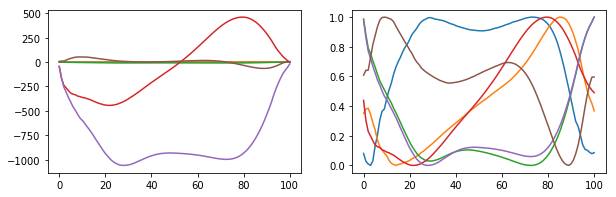

In [22]:
from sklearn.preprocessing import MinMaxScaler

temp = pd.DataFrame(np.mean(nor_mix_x_grf, axis=1))
temp[1] = pd.DataFrame(np.mean(nor_mix_y_grf, axis=1))
temp[2] = pd.DataFrame(np.mean(nor_mix_z_grf, axis=1))
temp[3] = pd.DataFrame(np.mean(nor_mix_x_mo, axis=1))
temp[4] = pd.DataFrame(np.mean(nor_mix_y_mo, axis=1))
temp[5] = pd.DataFrame(np.mean(nor_mix_z_mo, axis=1))

#########################################################
fit_data = temp
fit_data = np.array(fit_data)
fit_data.shape

scaler = MinMaxScaler()
scaler.fit(fit_data)
scaled_fit_data = scaler.transform(fit_data)

fig = plt.figure(figsize = (10,3))
ax = fig.add_subplot(1,2,1)
plt.plot(fit_data[:,0])
plt.plot(fit_data[:,1])
plt.plot(fit_data[:,2])
plt.plot(fit_data[:,3])
plt.plot(fit_data[:,4])
plt.plot(fit_data[:,5])

ax = fig.add_subplot(1,2,2)
plt.plot(scaled_fit_data[:,0])
plt.plot(scaled_fit_data[:,1])
plt.plot(scaled_fit_data[:,2])
plt.plot(scaled_fit_data[:,3])
plt.plot(scaled_fit_data[:,4])
plt.plot(scaled_fit_data[:,5])

fit_data = scaled_fit_data

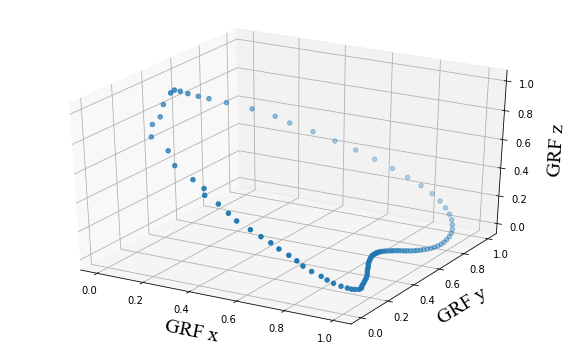

In [15]:
fig = plt.figure(figsize = (8,5))

labelsize = 20
labelpad = 10

ax = fig.add_subplot(111, projection='3d')
x = fit_data[:,0] # GRF X
y = fit_data[:,1] # GRF Y
z = fit_data[:,2] # GRF Z
ax.scatter(x, y, z)
ax.set_xlabel('GRF x',size = labelsize,labelpad = labelpad, fontname="Times New Roman")
ax.set_ylabel('GRF y',size = labelsize,labelpad = labelpad,fontname="Times New Roman")
ax.set_zlabel('GRF z',size = labelsize,labelpad = labelpad,fontname="Times New Roman")

fig.tight_layout()

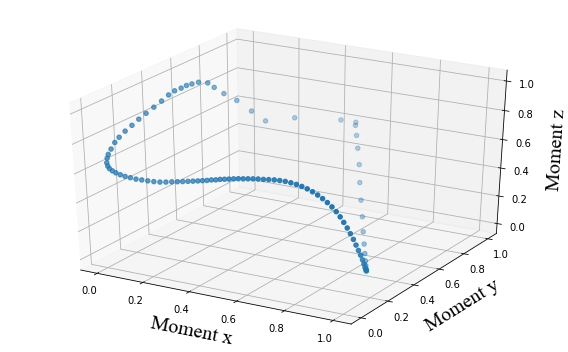

In [16]:
fig = plt.figure(figsize = (8,5))

labelsize = 20
labelpad = 10

ax = fig.add_subplot(111, projection='3d')
x = fit_data[:,3] # MO X
y = fit_data[:,4] # MO Y
z = fit_data[:,5] # MO Z
ax.scatter(x, y, z)
ax.set_xlabel('Moment x',size = labelsize,labelpad = labelpad, fontname="Times New Roman")
ax.set_ylabel('Moment y',size = labelsize,labelpad = labelpad,fontname="Times New Roman")
ax.set_zlabel('Moment z',size = labelsize,labelpad = labelpad,fontname="Times New Roman")

fig.tight_layout()

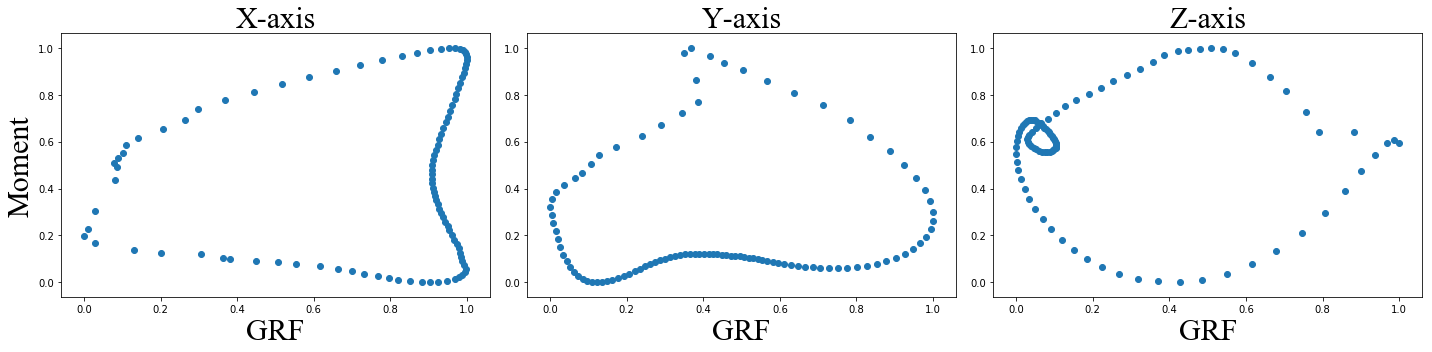

In [17]:
#######################################################################
fig = plt.figure(figsize = (20,5))
labelsize = 30

ax = fig.add_subplot(1, 3, 1)
x = fit_data[:,0] # GRF X
y = fit_data[:,3] # MO X
ax.scatter(x, y)
ax.set_xlabel('GRF',size = labelsize,fontname="Times New Roman")
ax.set_ylabel('Moment',size = labelsize,fontname="Times New Roman")
ax.set_title('X-axis',size = labelsize,fontname="Times New Roman")

ax1 = fig.add_subplot(1, 3, 2)
x = fit_data[:,1] # GRF X
y = fit_data[:,4] # MO X
ax1.scatter(x, y)
ax1.set_xlabel('GRF',size = labelsize,fontname="Times New Roman")
ax1.set_title('Y-axis',size = labelsize,fontname="Times New Roman")

ax2 = fig.add_subplot(1, 3, 3)
x = fit_data[:,2] # GRF X
y = fit_data[:,5] # MO X
ax2.scatter(x, y)
ax2.set_xlabel('GRF',size = labelsize,fontname="Times New Roman")
ax2.set_title('Z-axis',size = labelsize,fontname="Times New Roman")

fig.tight_layout()

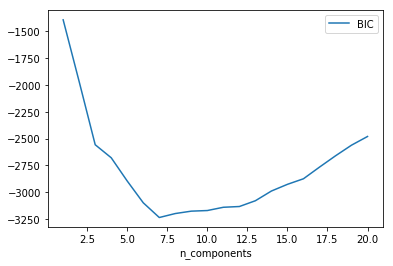

In [18]:
from sklearn.mixture import GaussianMixture as GMM_scikit

n_components = np.arange(1, 21)
models = [GMM_scikit(n, covariance_type='full', random_state=0).fit(fit_data)
          for n in n_components]

plt.plot(n_components, [m.bic(fit_data) for m in models], label='BIC')
#plt.plot(n_components, [m.aic(fit_data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [19]:
data_dimension = 6
number_of_gaussian = 7
iteration = 60

model = GMM(number_of_gaussian, iteration)
fitted_values = model.fit(np.array(fit_data))

#pos_full = []
#for pos, covar, w in zip(model.mean, model.sigma, model.pi):
#    pos_full.extend(pos)
    #print(pos, covar)

centers = np.zeros((number_of_gaussian,data_dimension))
for i in range(model.n_clusters):
    density = mvn(cov=model.sigma[i], mean=model.mean[i]).logpdf(fit_data)
    centers[i, :] = fit_data[np.argmax(density)]
    
print(centers)

Iteration: 0 Loss: 2188.491364
Iteration: 10 Loss: 2188.491779
Iteration: 20 Loss: 2188.491779
Iteration: 30 Loss: 2188.491779
Iteration: 40 Loss: 2188.491779
Iteration: 50 Loss: 2188.491779
[[0.10229149 0.50313641 0.90137589 0.55333196 0.90424744 0.47602252]
 [0.99228721 0.14873099 0.03090797 0.07426881 0.00452001 0.59964362]
 [0.9037309  0.96611766 0.11912838 0.98974113 0.16605096 0.18057247]
 [0.99188052 0.68529693 0.00383581 0.89492724 0.06307925 0.62446116]
 [0.50712983 0.03555343 0.44977072 0.08510335 0.41512128 0.99157035]
 [0.51610151 0.95675894 0.42705957 0.84540673 0.44427682 0.        ]
 [0.92759475 0.5068184  0.06500812 0.6108546  0.10712153 0.67265395]]


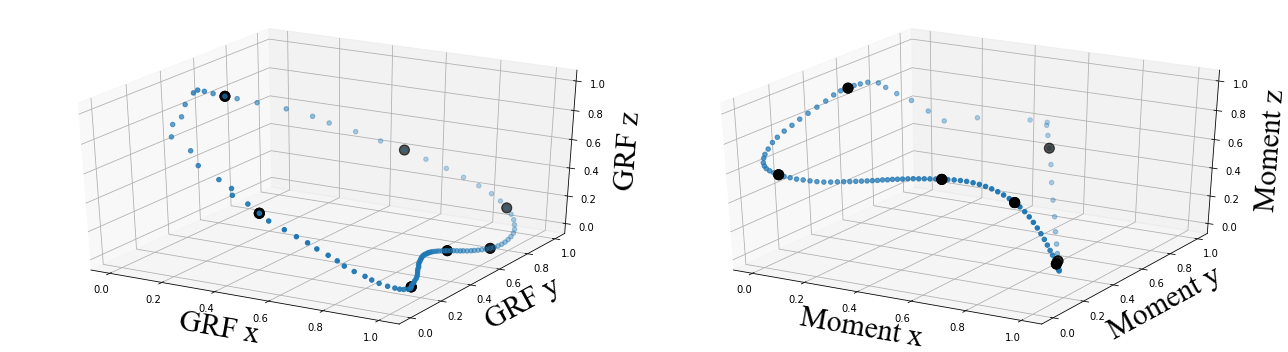

In [20]:
fig = plt.figure(figsize = (18,5))

ax = fig.add_subplot(121, projection='3d')
x = fit_data[:,0] # GRF X
y = fit_data[:,1] # GRF Y
z = fit_data[:,2] # GRF Z
ax.scatter(x, y, z)
for i in np.arange(3):
    x = centers[:,0]
    y = centers[:,1]
    z = centers[:,2]
    ax.scatter(x,y,z,c='k',s=100)
ax.set_xlabel('GRF x',size = labelsize,labelpad = labelpad, fontname="Times New Roman")
ax.set_ylabel('GRF y',size = labelsize,labelpad = labelpad,fontname="Times New Roman")
ax.set_zlabel('GRF z',size = labelsize,labelpad = labelpad,fontname="Times New Roman")

ax = fig.add_subplot(122, projection='3d')
x = fit_data[:,3] # MO X
y = fit_data[:,4] # MO Y
z = fit_data[:,5] # MO Z
ax.scatter(x, y, z)
for i in np.arange(3):
    x = centers[:,3]
    y = centers[:,4]
    z = centers[:,5]
    ax.scatter(x,y,z,c='k',s=100)
ax.set_xlabel('Moment x',size = labelsize,labelpad = labelpad, fontname="Times New Roman")
ax.set_ylabel('Moment y',size = labelsize,labelpad = labelpad,fontname="Times New Roman")
ax.set_zlabel('Moment z',size = labelsize,labelpad = labelpad,fontname="Times New Roman")

fig.tight_layout()

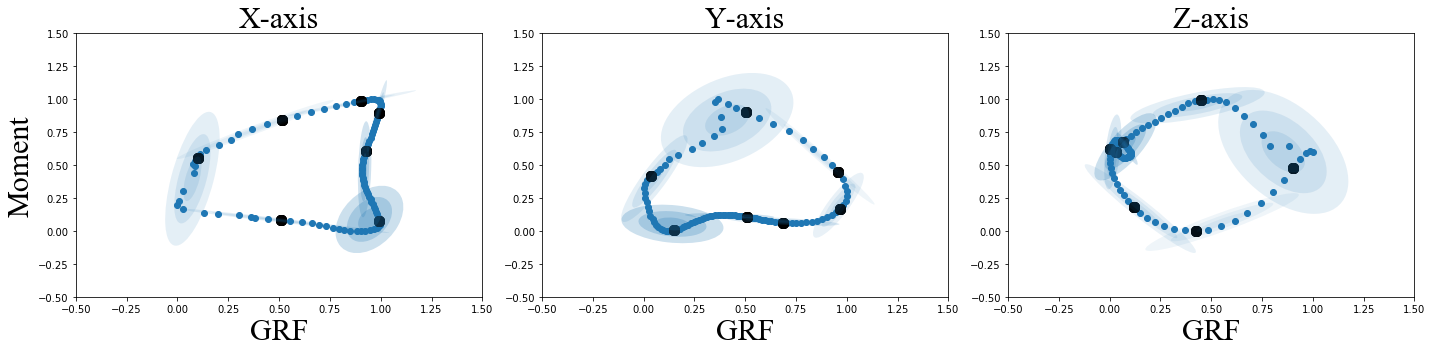

In [21]:
fig = plt.figure(figsize = (20,5))
labelsize = 30

ax = fig.add_subplot(1, 3, 1)
x = fit_data[:,0] # GRF X
y = fit_data[:,3] # MO X
ax.scatter(x, y)
for i in np.arange(number_of_gaussian):
    x = centers[:,0]
    y = centers[:,3]
    ax.scatter(x,y,c='k',s=100)
w_factor = 0.2 / model.pi.max()
for pos, covar, w in zip(model.mean, model.sigma, model.pi):
    pos = pos[[0,3]]
    covar = covar[[0,3],:]
    covar = covar[:,[0,3]]   
    draw_ellipse(pos, covar, alpha = w)
ax.set_xlabel('GRF',size = labelsize,fontname="Times New Roman")
ax.set_ylabel('Moment',size = labelsize,fontname="Times New Roman")
ax.set_title('X-axis',size = labelsize,fontname="Times New Roman")
ax.set_xlim((-0.5, 1.5))
ax.set_ylim((-0.5, 1.5))

ax1 = fig.add_subplot(1, 3, 2)
x = fit_data[:,1] # GRF X
y = fit_data[:,4] # MO X
ax1.scatter(x, y)
for i in np.arange(number_of_gaussian):
    x = centers[:,1]
    y = centers[:,4]
    ax1.scatter(x,y,c='k',s=100)
w_factor = 0.2 / model.pi.max()
for pos, covar, w in zip(model.mean, model.sigma, model.pi):
    pos = pos[[1,4]]
    covar = covar[[1,4],:]
    covar = covar[:,[1,4]]   
    draw_ellipse(pos, covar, alpha = w)
ax1.set_xlabel('GRF',size = labelsize,fontname="Times New Roman")
ax1.set_title('Y-axis',size = labelsize,fontname="Times New Roman")
ax1.set_xlim((-0.5, 1.5))
ax1.set_ylim((-0.5, 1.5))

ax2 = fig.add_subplot(1, 3, 3)
x = fit_data[:,2] # GRF X
y = fit_data[:,5] # MO X
ax2.scatter(x, y)
for i in np.arange(number_of_gaussian):
    x = centers[:,2]
    y = centers[:,5]
    ax2.scatter(x,y,c='k',s=100)
w_factor = 0.2 / model.pi.max()
for pos, covar, w in zip(model.mean, model.sigma, model.pi):
    pos = pos[[2,5]]
    covar = covar[[2,5],:]
    covar = covar[:,[2,5]]   
    draw_ellipse(pos, covar, alpha = w)
ax2.set_xlabel('GRF',size = labelsize,fontname="Times New Roman")
ax2.set_title('Z-axis',size = labelsize,fontname="Times New Roman")
ax2.set_xlim((-0.5, 1.5))
ax2.set_ylim((-0.5, 1.5))

fig.tight_layout()